# Linear Regression with Gradient Descent using PyTorch

by Daniel Marostica

In [404]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Creating Dataset

In [405]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Adding noise to linear function

In [406]:
y = 5 - 10 * x + torch.normal(mean=torch.zeros(len(x)), std=2)
y

tensor([  0.8979,  -5.6293, -18.6121, -27.1287, -34.5780, -46.7576, -55.4267,
        -65.6339, -75.3524, -87.5874])

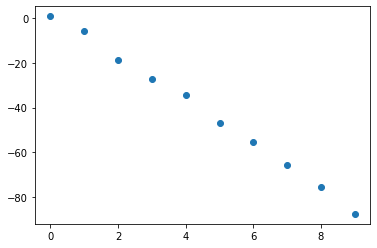

In [407]:
plt.plot(x, y, 'o')

## Linear Regression

## Random slope and intercept

In [408]:
m = torch.tensor(3.).requires_grad_() # torch requires floating input
m

tensor(3., requires_grad=True)

In [409]:
b = torch.tensor(5.).requires_grad_()
b

tensor(5., requires_grad=True)

Regression method

In [410]:
def regression(x, m, b):
    return x * m + b

In [411]:
regression(x, m, b) # test

tensor([ 5.,  8., 11., 14., 17., 20., 23., 26., 29., 32.],
       grad_fn=<AddBackward0>)

Cost function: mean squared error

In [412]:
def mse(y, yhat):
    se = torch.sum((yhat - y)**2)
    return se/len(yhat)

Testing MSE as a function of $m$

In [413]:
mse_test = []
for i in range(-30, 30):
    test = mse(y, regression(x, i, b)).detach().numpy()
    mse_test.append(test)

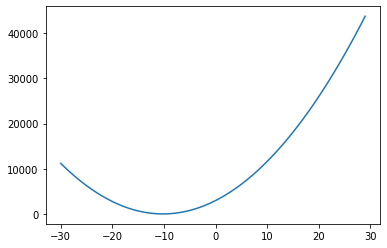

In [414]:
plt.plot(range(-30, 30), mse_test)

Good, gradient descent must find this minimum, where $x = 10$.

## Gradient Descent

In [415]:
optimizer = torch.optim.SGD([m, b], lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Training

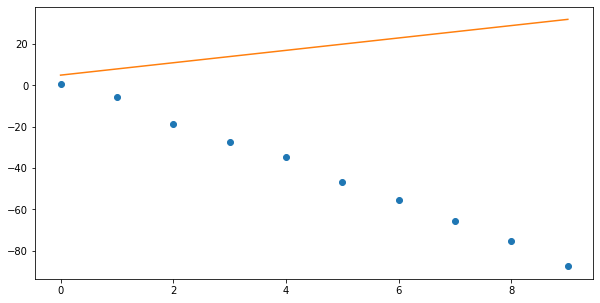

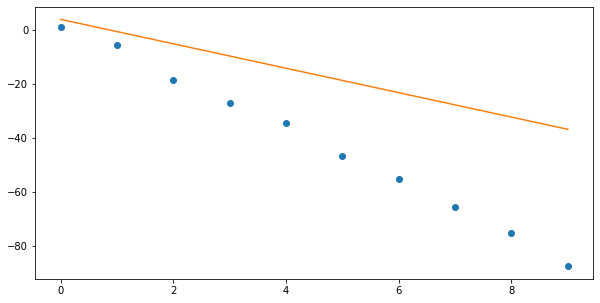

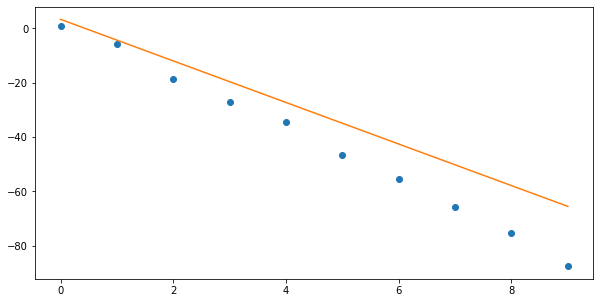

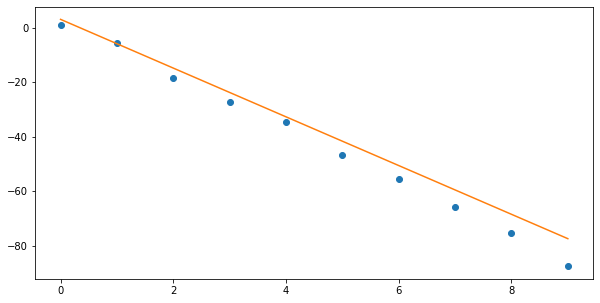

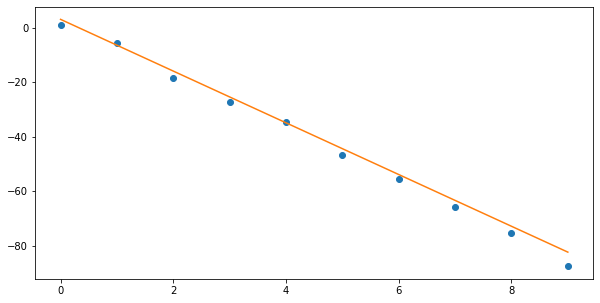

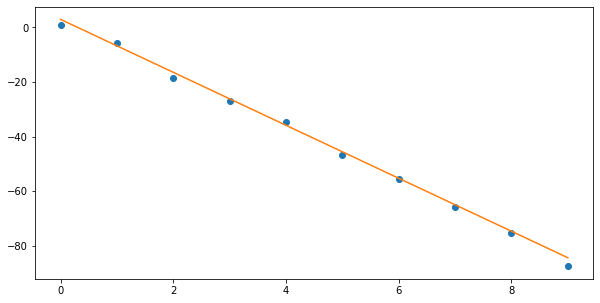

In [416]:
for epoch in range(6):

    plt.figure(figsize=(10,5))
    plt.plot(x, y, 'o')
    plt.plot(x.detach().numpy(), m.detach().numpy() * x.detach().numpy() + b.detach().numpy()) # detaching is required

    optimizer.zero_grad() # so as not to accumulate from previous epochs
    C = mse(y, regression(x, m, b)) # cost
    C.backward() # cost gradient
    optimizer.step() # optimize

## Results

Slope and intercept

In [417]:
m

tensor(-9.7990, requires_grad=True)

In [418]:
b

tensor(2.9438, requires_grad=True)